In [2]:
from google.colab import drive
drive.mount('/content/drive')

from IPython.display import display
from PIL import Image

PATH = '/content/drive/MyDrive/Documents/Colab Notebooks/PythonForFinance/'

Mounted at /content/drive


In 1952, Harry Markowitz released a paper on finance that changed finance forever. The jist? Diversification. Don't put all your eggs in one basket. He proved the existence of an efficient set of portfolios that optimize investor's return for the amount of risk they're willing to accept.
- ie. investments in multiple securities shouldn't be analyzed separately. They should be considered in a portfolio and investors should understand the relationship between securities in their portfolio

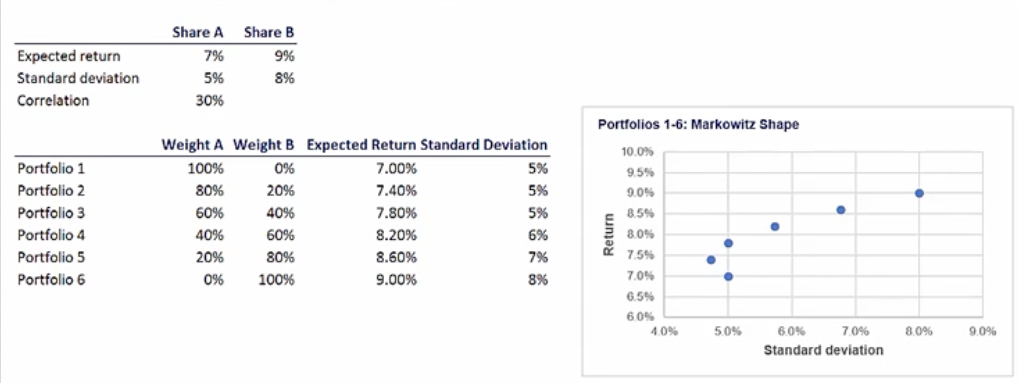

In [129]:
img = Image.open(PATH + 'assets/markowitz_efficient_frontier.png')
display(img)

Remember:

To calculate the returns of a portfolio, simply multiply each asset's return by their respective weights and add them all up
- Sum(Weight*Return)

To find the std dev of a whole portfolio, it's the square root of the following formula:


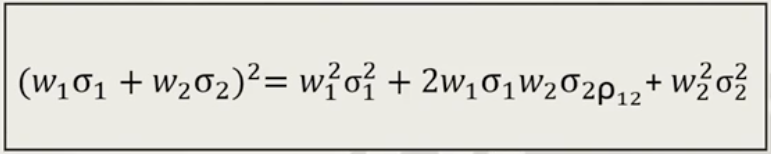

In [3]:
img = Image.open(PATH + 'assets/portfolio_variance.png')
display(img)

### Obtaining the Efficient Frontier

In [130]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
# Jupyter notebook specific/facilitates plotting graphs just below code cells and storing them in notebook document
%matplotlib inline

In [131]:
assets = ['PG', '^GSPC'] # GSPC is the SP500
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = yf.download(a, start='2010-1-1', auto_adjust=False)['Adj Close']

pf_data.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,PG,^GSPC
Date,,
2025-06-24,160.360001,6092.180176
2025-06-25,158.970001,6092.160156
2025-06-26,158.630005,6141.020020
2025-06-27,159.860001,6173.069824
2025-06-30,158.809998,6194.399902


<Axes: xlabel='Date'>

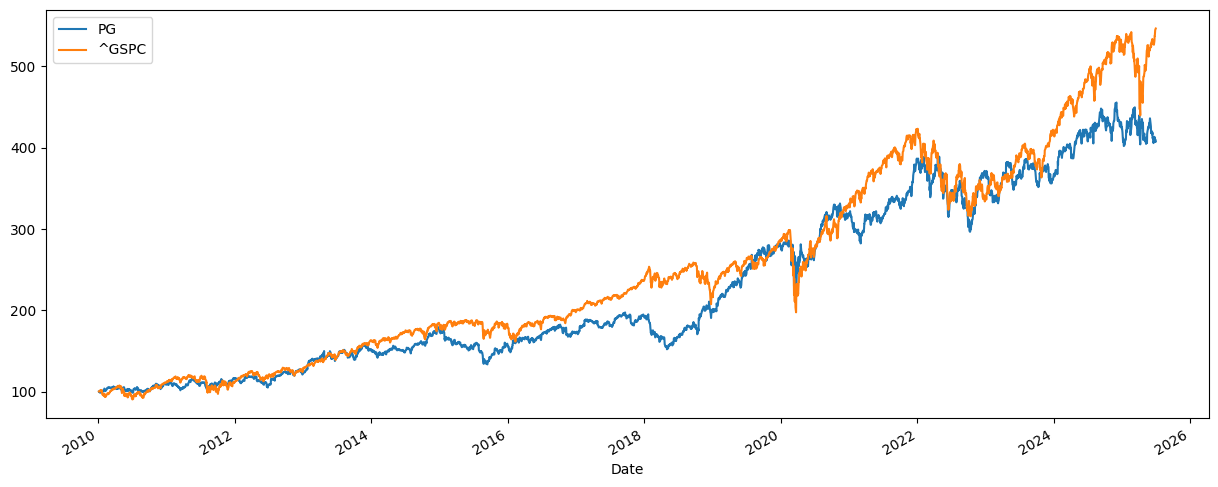

In [132]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(15, 6)) # Normalized to 100

In [133]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [134]:
log_returns.mean() * 250 # Average

,0
PG,0.090207
^GSPC,0.109036


In [135]:
log_returns.cov() * 250 # Covariance

,PG,^GSPC
PG,0.029491,0.015663
^GSPC,0.015663,0.030537


In [136]:
log_returns.corr() # Correlation

,PG,^GSPC
PG,1.000000,0.521932
^GSPC,0.521932,1.000000


Notice that the correlation > .3 (30%). This implies a statistically significant correlation in finance while something in physics might require a coefficient closer to .9 (90%)

In [137]:
num_assets = len(assets)
print(num_assets)

2


In [138]:
# creating randomized weights for the portfolio
weights = np.random.random(num_assets)
weights /= np.sum(weights) # Ensuring the sum of weights alwyas equals 1
weights

array([0.31399578, 0.68600422])

In [139]:
# Excpected Portfolio Return
pf_expected_return = np.sum(weights * log_returns.mean()) * 250
print(pf_expected_return)

0.10312395200410521


In [140]:
# Excpected Portfolio Variance
pf_expected_variance = np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))
print(pf_expected_variance)

0.024025799564234472


In [141]:
# Expected Portfolio Volatility:
pf_volatility = np.sqrt(pf_expected_variance)
print(pf_volatility)

0.1550025792180068


In [142]:
# Generating random portfolio weights for graphing the efficient curve for 1000 combinations of PG and GSPC

portfolio_returns = []
portfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))


# Converting to np arrays for ease of manipulability
portfolio_returns = np.array(portfolio_returns)
portfolio_volatilities = np.array(portfolio_volatilities)

portfolio_returns, portfolio_volatilities

(array([0.10784551, 0.09755071, 0.10807659, 0.09979219, 0.10059519,
        0.09708089, 0.10448416, 0.09517909, 0.09865825, 0.09963159,
        0.10166222, 0.1007997 , 0.09205406, 0.10404345, 0.09869508,
        0.10248029, 0.09447877, 0.1059605 , 0.09608327, 0.1034745 ,
        0.10209155, 0.09935924, 0.09225451, 0.093141  , 0.09476374,
        0.0958199 , 0.09818967, 0.10460423, 0.09042142, 0.09497052,
        0.10221594, 0.09973537, 0.09185092, 0.09916177, 0.09043446,
        0.10876204, 0.09548724, 0.100337  , 0.0931721 , 0.09644809,
        0.09635502, 0.09925492, 0.10341258, 0.10188174, 0.09929078,
        0.10100308, 0.10132584, 0.09808036, 0.09906385, 0.10774249,
        0.09831024, 0.10597106, 0.09932573, 0.09101859, 0.10619124,
        0.10375113, 0.09585744, 0.09072556, 0.09046253, 0.09135879,
        0.09453291, 0.09960478, 0.10814299, 0.10192592, 0.10115513,
        0.09937825, 0.09228309, 0.09941572, 0.10137557, 0.10569628,
        0.10110733, 0.09476015, 0.09793519, 0.09

In [143]:
portfolios = pd.DataFrame({'Return': portfolio_returns, 'Volatility': portfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.107846,0.169618
1,0.097551,0.151889
2,0.108077,0.170573
3,0.099792,0.151162
4,0.100595,0.151555


In [144]:
portfolios.tail()

,Return,Volatility
995,0.104530,0.158307
996,0.101313,0.152197
997,0.102438,0.153742
998,0.106523,0.164552
999,0.094851,0.156255


Text(0, 0.5, 'Expected Return')

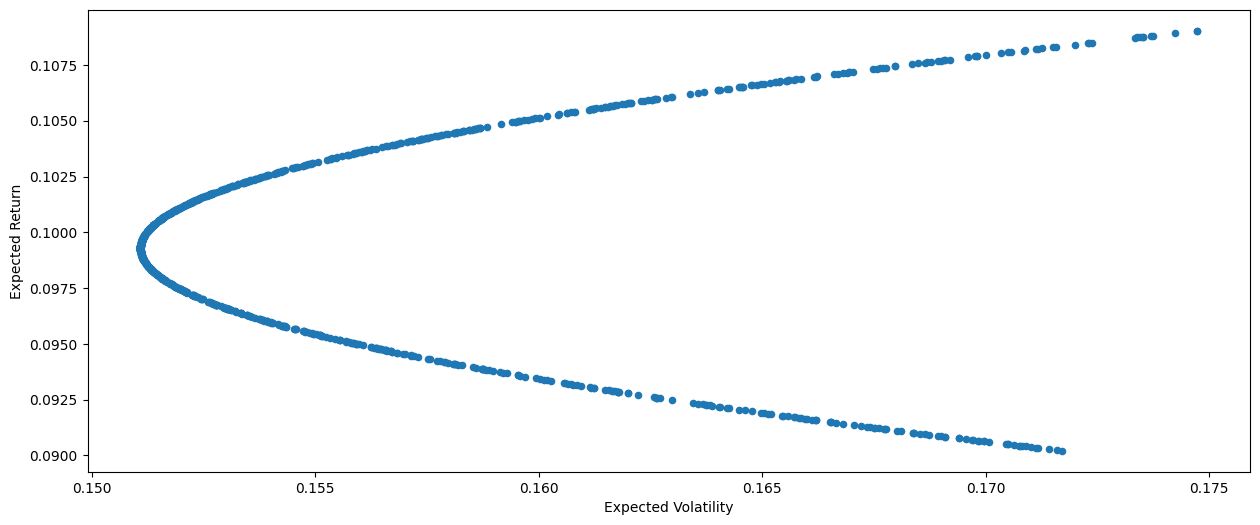

In [146]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15a, 6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
